<a href="https://colab.research.google.com/github/neelchoudhury/nlp_notebooks/blob/master/harry_potter_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [4]:
from google.colab import files
files = files.upload()

Saving Book 1 - The Philosopher's Stone.txt to Book 1 - The Philosopher's Stone.txt
Saving Book 2 - The Chamber of Secrets.txt to Book 2 - The Chamber of Secrets.txt
Saving Book 3 - The Prisoner of Azkaban.txt to Book 3 - The Prisoner of Azkaban.txt
Saving Book 4 - The Goblet of Fire.txt to Book 4 - The Goblet of Fire.txt
Saving Book 5 - The Order of the Phoenix.txt to Book 5 - The Order of the Phoenix.txt
Saving Book 6 - The Half Blood Prince.txt to Book 6 - The Half Blood Prince.txt
Saving Book 7 - The Deathly Hallows.txt to Book 7 - The Deathly Hallows.txt


In [5]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


SystemError: ignored

The steps are - 

1. Clean
2. Tokenize
3. Verify data is properly structured.
4. Retrain word2vec with gensim
5. Check emdbedding outputs
6. Check relationship
7. Repeat with different Embeddings size from Step 4

Steps 1. Clean & 2. Tokenize

Finally get a list of tokens per sentence, across all books

*NOTE* - Save the dataset once created properly(i.e. after Step 3)

In [6]:
# testing 

type(files)

dict

In [ ]:
for k, v in files.items():
  print(len(v))

507421
567946
724161
1263568
1715630
1128542
1305169


In [10]:
import nltk

In [11]:
for k,v in files.items():
  v.decode("utf-8")

In [12]:
for k, v in files.items():
  print(type(v))

<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>


In [14]:
files_str = {}

for k,v in files.items():
  files_str[k] = str(v)

In [15]:
for k,v in files_str.items():
  print(type(v))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [19]:
book1 = files_str["Book 1 - The Philosopher's Stone.txt"]

In [20]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(book1)
type(tokens)

list

In [22]:
tokens[:40]

["b'/",
 '\\r\\n\\r\\n\\r\\n\\r\\n\\r\\nTHE',
 'BOY',
 'WHO',
 'LIVED',
 '\\r\\n\\r\\nMr',
 '.',
 'and',
 'Mrs.',
 'Dursley',
 ',',
 'of',
 'number',
 'four',
 ',',
 'Privet',
 'Drive',
 ',',
 '\\r\\nwere',
 'proud',
 'to',
 'say',
 'that',
 'they',
 'were',
 'perfectly',
 'normal',
 ',',
 '\\r\\nthank',
 'you',
 'very',
 'much',
 '.',
 'They',
 'were',
 'the',
 'last',
 'people',
 'you\\xe2\\x80\\x99d',
 '\\r\\nexpect']

In [23]:
text = nltk.Text(tokens)

In [24]:
type(text)

nltk.text.Text

In [25]:
text[0:40]

["b'/",
 '\\r\\n\\r\\n\\r\\n\\r\\n\\r\\nTHE',
 'BOY',
 'WHO',
 'LIVED',
 '\\r\\n\\r\\nMr',
 '.',
 'and',
 'Mrs.',
 'Dursley',
 ',',
 'of',
 'number',
 'four',
 ',',
 'Privet',
 'Drive',
 ',',
 '\\r\\nwere',
 'proud',
 'to',
 'say',
 'that',
 'they',
 'were',
 'perfectly',
 'normal',
 ',',
 '\\r\\nthank',
 'you',
 'very',
 'much',
 '.',
 'They',
 'were',
 'the',
 'last',
 'people',
 'you\\xe2\\x80\\x99d',
 '\\r\\nexpect']

In [26]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
text.collocations()

J.K. Rowling; Philosophers Stone; \xe2\x80\x9d said; Harry Potter;
Uncle Vernon; Aunt Petunia; Professor McGonagall; said Ron; said
Harry; said Hagrid; ... \xe2\x80\x9d; Nimbus Two; Invisibility Cloak;
Mr. Dursley; \xe2\x80\x94 \xe2\x80\x9d; \r\n\r\nUncle Vernon; Two
Thousand; Great Hall; common room; \xe2\x80\x9d \r\n\r\nHarry


In [28]:
text[-40:]

['They',
 'don\\xe2\\x80\\x99t',
 '\\r\\nknow',
 'we\\xe2\\x80\\x99re',
 'not',
 'allowed',
 'to',
 'use',
 'magic',
 'at',
 'home',
 '.',
 'I\\xe2\\x80\\x99m',
 '\\r\\ngoing',
 'to',
 'have',
 'a',
 'lot',
 'of',
 'fun',
 'with',
 'Dudley',
 'this',
 'summer',
 '...',
 '\\xe2\\x80\\x9d',
 '\\r\\n\\r\\n\\r\\n\\r\\nPage',
 '|',
 '348',
 'Harry',
 'Potter',
 'and',
 'the',
 'Philosophers',
 'Stone',
 '-',
 'J.K.',
 'Rowling',
 '\\r\\n\\r\\n\\r\\n\\r\\n\\r\\n',
 "'"]

In [29]:
import re
re.sub("[\\\\r, \\\\n]", " ", book1.strip().lower())
# re.sub("[^A-Za-z]", " ", book1.strip().lower())

'b\'/                     the boy who lived         m . a d m s. du sley  of  umbe  fou   p ivet d ive      we e p oud to say that they we e pe fectly  o mal      tha k you ve y much. they we e the last people you xe2 x80 x99d     expect to be i volved i  a ythi g st a ge o      myste ious  because they just did  xe2 x80 x99t hold with such      o se se.         m . du sley was the di ecto  of a fi m called     g u  i gs  which made d ills. he was a big  beefy     ma  with ha dly a y  eck  although he did have a     ve y la ge mustache. m s. du sley was thi  a d     blo de a d had  ea ly twice the usual amou t of      eck  which came i  ve y useful as she spe t so     much of he  time c a i g ove  ga de  fe ces  spyi g     o  the  eighbo s. the du sley s had a small so      called dudley a d i  thei  opi io  the e was  o fi e      boy a ywhe e.         the du sleys had eve ythi g they wa ted  but they     also had a sec et  a d thei  g eatest fea  was that     somebody would discove  i

In [36]:
book1 = files["Book 1 - The Philosopher's Stone.txt"]

In [37]:
book1_str = book1.decode("utf-8")

In [38]:
book1_str[:400]

'/ \r\n\r\n\r\n\r\n\r\nTHE BOY WHO LIVED \r\n\r\nMr. and Mrs. Dursley, of number four, Privet Drive, \r\nwere proud to say that they were perfectly normal, \r\nthank you very much. They were the last people you’d \r\nexpect to be involved in anything strange or \r\nmysterious, because they just didn’t hold with such \r\nnonsense. \r\n\r\nMr. Dursley was the director of a firm called \r\nGrunnings, which made drills. He was a bi'

In [39]:
book1_str_clean = re.sub(r'\r|\n', r'', book1_str.strip().lower())

In [40]:
book1_str_clean[:2000]

'/ the boy who lived mr. and mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much. they were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. mr. dursley was the director of a firm called grunnings, which made drills. he was a big, beefy man with hardly any neck, although he did have a very large mustache. mrs. dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. the dursley s had a small son called dudley and in their opinion there was no finer boy anywhere. the dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. they didn’t think they could bear it if anyone found out about the potters. mrs. potter was mrs. dursley’s sister, but they hadn’t

**NOTE** - Clean the Footer Later

In [41]:
from nltk.tokenize import sent_tokenize

In [42]:
book1_sent = sent_tokenize(book1_str_clean)

In [43]:
type(book1_sent)

list

In [44]:
book1_sent[:20]

['/ the boy who lived mr. and mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much.',
 'they were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.',
 'mr. dursley was the director of a firm called grunnings, which made drills.',
 'he was a big, beefy man with hardly any neck, although he did have a very large mustache.',
 'mrs. dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.',
 'the dursley s had a small son called dudley and in their opinion there was no finer boy anywhere.',
 'the dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.',
 'they didn’t think they could bear it if anyone found out about the potters.',
 'mrs. potter was mrs. 

In [45]:
book1_tokens = []

for sent in book1_sent:
  tokens = word_tokenize(sent)
  book1_tokens.append(tokens)

In [46]:
book1_tokens[:3]

[['/',
  'the',
  'boy',
  'who',
  'lived',
  'mr.',
  'and',
  'mrs.',
  'dursley',
  ',',
  'of',
  'number',
  'four',
  ',',
  'privet',
  'drive',
  ',',
  'were',
  'proud',
  'to',
  'say',
  'that',
  'they',
  'were',
  'perfectly',
  'normal',
  ',',
  'thank',
  'you',
  'very',
  'much',
  '.'],
 ['they',
  'were',
  'the',
  'last',
  'people',
  'you',
  '’',
  'd',
  'expect',
  'to',
  'be',
  'involved',
  'in',
  'anything',
  'strange',
  'or',
  'mysterious',
  ',',
  'because',
  'they',
  'just',
  'didn',
  '’',
  't',
  'hold',
  'with',
  'such',
  'nonsense',
  '.'],
 ['mr.',
  'dursley',
  'was',
  'the',
  'director',
  'of',
  'a',
  'firm',
  'called',
  'grunnings',
  ',',
  'which',
  'made',
  'drills',
  '.']]

In [83]:
import gensim
from gensim.models.phrases import Phrases, Phraser

bigram = Phrases(book1_tokens)

In [48]:
book1_final_tokens = []

for sent in book1_tokens:
  phrases = bigram[sent]
  book1_final_tokens.append(phrases)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [49]:
book1_final_tokens[:3]

[['/',
  'the',
  'boy',
  'who',
  'lived',
  'mr.',
  'and',
  'mrs._dursley',
  ',',
  'of',
  'number_four',
  ',',
  'privet_drive',
  ',',
  'were',
  'proud',
  'to',
  'say',
  'that',
  'they_were',
  'perfectly',
  'normal',
  ',',
  'thank',
  'you',
  'very',
  'much',
  '.'],
 ['they_were',
  'the',
  'last',
  'people',
  'you',
  '’_d',
  'expect',
  'to',
  'be',
  'involved',
  'in',
  'anything',
  'strange',
  'or',
  'mysterious',
  ',',
  'because',
  'they',
  'just',
  'didn_’',
  't',
  'hold',
  'with',
  'such',
  'nonsense',
  '.'],
 ['mr._dursley',
  'was',
  'the',
  'director',
  'of',
  'a',
  'firm',
  'called',
  'grunnings',
  ',',
  'which',
  'made',
  'drills',
  '.']]

In [50]:
import gensim.models

model = gensim.models.Word2Vec(sentences=book1_final_tokens)

In [52]:
model.wv['harry_potter']

array([-0.81968653,  0.6814195 ,  2.475392  , -0.26248637, -0.2420957 ,
        0.9176926 , -0.18707876, -0.46300837, -0.7588065 ,  0.77822345,
        0.8756183 ,  0.5353467 , -1.0246177 ,  0.30332708,  0.22880474,
       -0.78877914,  0.50785923,  1.4371903 ,  0.5065165 , -1.8203307 ,
        0.59112793, -1.4795657 , -1.2358516 ,  1.1722305 ,  0.77980053,
        1.233754  ,  1.7426643 ,  0.82811356, -1.0969768 , -0.353099  ,
        1.0827479 ,  0.07745466, -0.24850821,  0.330031  ,  1.3708762 ,
        0.43450195, -0.52114445,  0.45916513, -0.25552133,  0.35785088,
        0.23921491,  0.6091166 , -1.0697988 ,  0.0863454 , -0.2470475 ,
        1.4971228 ,  0.7375502 ,  0.13309935, -0.17062989, -0.76794046,
        0.5736044 , -1.2244809 ,  0.92582774,  0.17957847,  0.6509088 ,
        0.6455291 ,  0.34982455, -0.41300237, -0.20769046, -0.581322  ,
       -0.60922813,  0.32474443,  1.1449945 ,  0.33395728, -0.38608584,
       -0.17152898,  0.32455248,  0.01380631, -0.02432466, -0.91

In [53]:
model.wv

In [54]:
for i, v in enumerate(model.wv.vocab):
  print(v)
  if i == 10:
    break

the
boy
who
lived
mr.
and
mrs._dursley
,
of
number_four
privet_drive


In [55]:

model.wv.most_similar("harry_potter")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('stone_-', 0.9995054602622986),
 ('page_|', 0.9990794658660889),
 ('j.k._rowling', 0.9988693594932556),
 ('the_philosophers', 0.9985267519950867),
 ('11', 0.9760141968727112),
 ('and', 0.9301198720932007),
 ('stone_-j.k.', 0.9228330254554749),
 ('squinting', 0.8938280344009399),
 ('rowling', 0.8786938190460205),
 ('speed', 0.8009791374206543)]

In [56]:

model.wv.most_similar("dumbledore")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('wood', 0.9997372031211853),
 ('nothing', 0.9996944665908813),
 ('who', 0.9996231198310852),
 ('!', 0.9996151924133301),
 ('peeves', 0.9995352625846863),
 ('too', 0.999510645866394),
 ('enough', 0.9995105266571045),
 ('rather', 0.9994961619377136),
 ('come_on', 0.9994945526123047),
 ('gringotts', 0.9994800686836243)]

In [57]:

model.wv.most_similar("hermione")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ron', 0.9989537000656128),
 ('quidditch', 0.998914897441864),
 ('glass', 0.9988478422164917),
 ('took', 0.9988465309143066),
 ('coming', 0.9988276362419128),
 ('mind', 0.998773455619812),
 ('nose', 0.9987044930458069),
 ('different', 0.9986817836761475),
 ('silver', 0.9986597895622253),
 ('firenze', 0.9986405372619629)]

In [58]:

model.wv.most_similar("harry")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('hermione', 0.9983203411102295),
 ('lived', 0.9981186389923096),
 ('portrait', 0.9980790019035339),
 ('woke', 0.9980189800262451),
 ('firenze', 0.9980021715164185),
 ('k', 0.9979540109634399),
 ('important', 0.9979313611984253),
 ('beard', 0.9978854656219482),
 ('coming', 0.9977362155914307),
 ('flat', 0.9977315068244934)]

In [59]:

model.wv.most_similar("quidditch")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(':', 0.9997459053993225),
 ('took', 0.9996535778045654),
 ('reached', 0.9996189475059509),
 ('glass', 0.9995788931846619),
 ('mind', 0.999578595161438),
 ('stopped', 0.9995765686035156),
 ('thousand', 0.9995383024215698),
 ('different', 0.9995304346084595),
 ('mr.', 0.9994890689849854),
 ('became', 0.9994890689849854)]

In [60]:

model.wv.most_similar("voldemort")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('hogwarts', 0.9997613430023193),
 ('has', 0.9997249841690063),
 ('boy', 0.999669075012207),
 ('ronan', 0.9996620416641235),
 ('will_be', 0.9996471405029297),
 ('come', 0.9996238350868225),
 ('will', 0.9996116161346436),
 ('kill', 0.9996097087860107),
 ('yet', 0.9995734691619873),
 ('nearly', 0.9995683431625366)]

In [61]:
import sklearn
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [62]:
%matplotlib notebook
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

In [ ]:
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
import numpy as np
%matplotlib inline

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))
    plt.show();



try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

In [65]:
get_ipython()

before


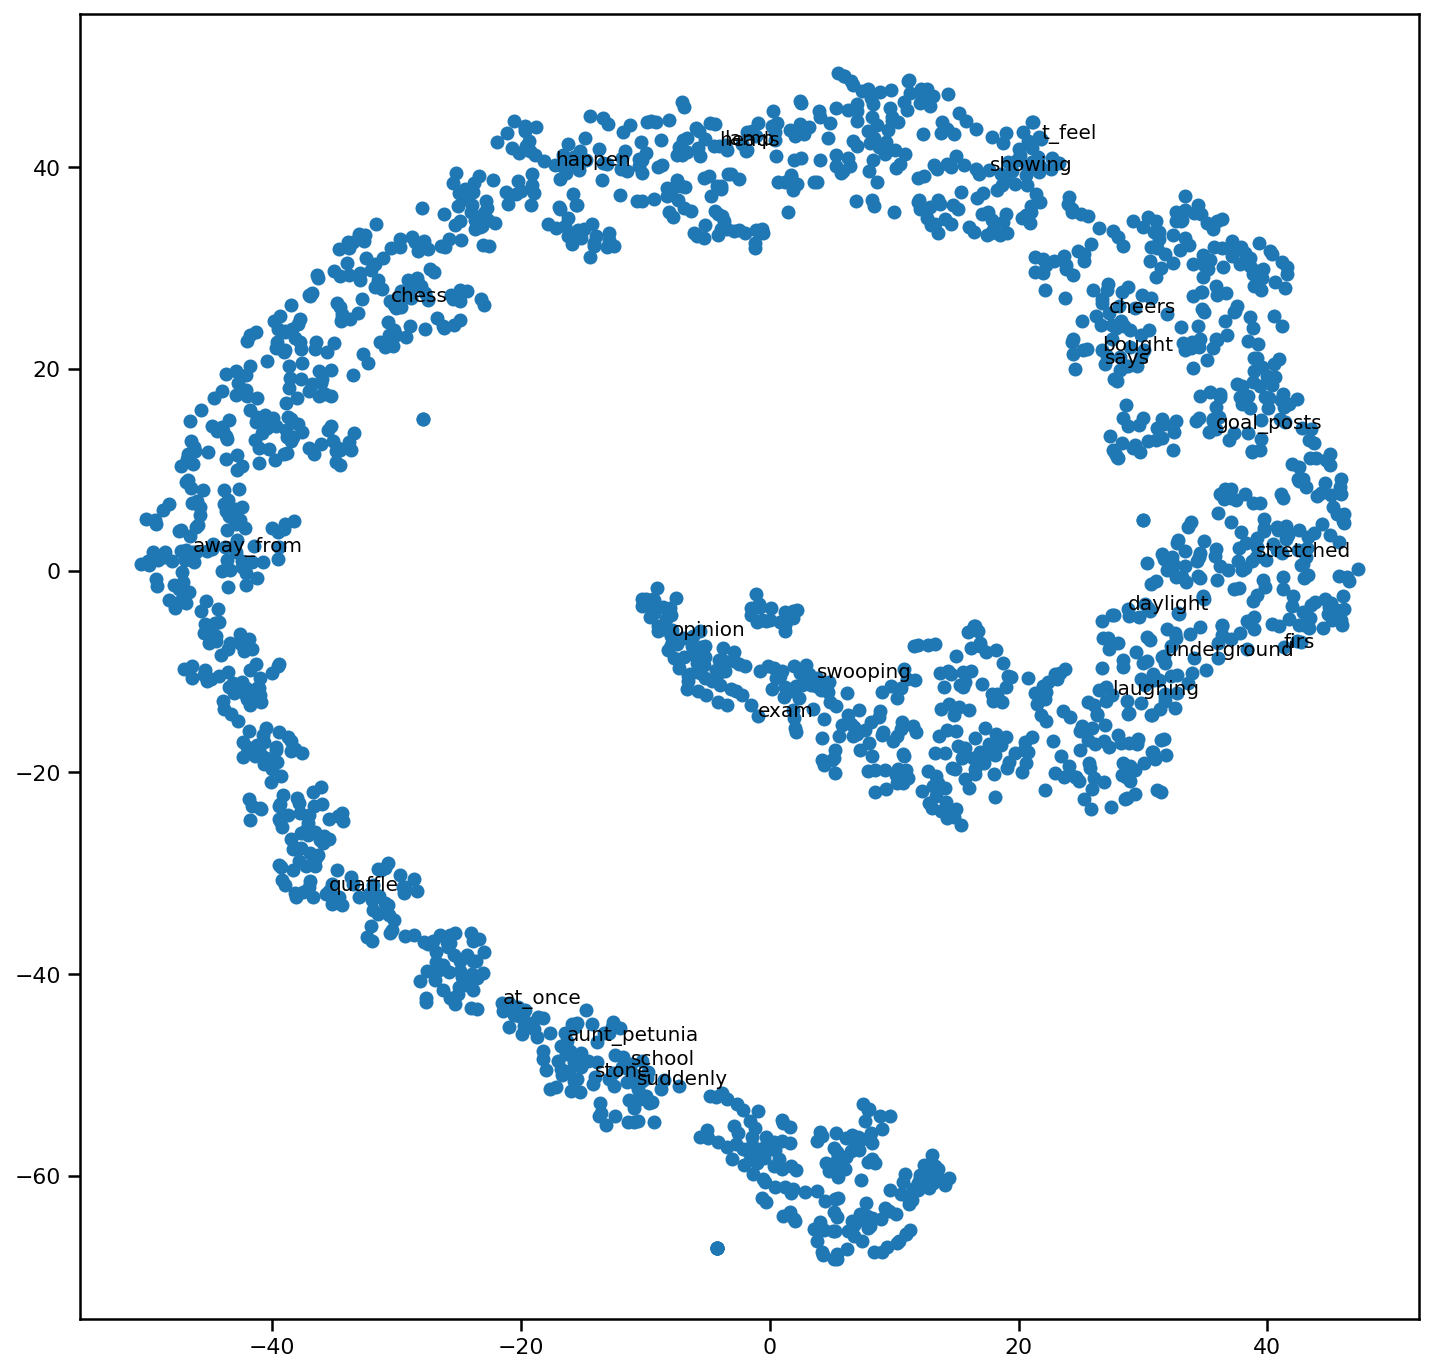

after


In [70]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

random.seed(0)
print("before")
plt.figure(figsize=(12, 12))
plt.scatter(x_vals, y_vals)

# Label randomly subsampled 25 data points
#

# labels2 = ["harry", "hermione", "ron", "malfoy", "mcgonagall", "dumbledore"]
indices = list(range(len(labels)))
selected_indices = random.sample(indices, 25)
for i in selected_indices:
# for i, _ in enumerate(labels2):
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))
plt.show();
print("after")

**TRAINING ON ALL 7 BOOKS**

In [71]:
all_text = []

books = ['Harry Potter and the Philosophers Stone', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire',
         'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Half Blood Prince', 'Harry Potter and the Deathly Hallows']

for k,v in files.items():
  book_text = v.decode("utf-8")
  book_text = re.sub(r'[^a-zA-Z,.]', r' ', book_text.strip().lower())
  book_text = re.sub(r'\|[\s]*[\d]+', r'', book_text.strip().lower())
  book_text = re.sub(r'- J.K. Rowling', r'', book_text.strip().lower())
  for book in books:
    book_text = re.sub(book, "", book_text.strip().lower())
  all_text.append(book_text)

In [72]:
all_text_concat = " ".join(all_text)

In [74]:
all_sents = sent_tokenize(all_text_concat)

In [75]:
len(all_sents)

64036

In [76]:
all_sents[400:402]

['he had been given a week   in his cupboard for this, even though he had tried to   explain that he couldn t explain how it had grown   back so quickly.',
 'another time, aunt petunia had been trying to force   him into a revolting old sweater of dudley s  brown   with orange puff balls .']

In [77]:
all_tokens = []
all_tokens_cnt = 0
for sent in all_sents:
  tokens = word_tokenize(sent)
  all_tokens_cnt += len(tokens)
  all_tokens.append(tokens)

In [78]:
all_tokens_cnt

1326776

In [79]:
all_tokens[4000:4005]

[['and',
  'we',
  'have',
  'got',
  'the',
  'invisibility',
  'cloak',
  ',',
  'malfoy',
  'doesn',
  't',
  'know',
  'about',
  'that',
  '.'],
 ['they',
  'found',
  'fang',
  'the',
  'boarhound',
  'sitting',
  'outside',
  'with',
  'a',
  'bandaged',
  'tail',
  'when',
  'they',
  'went',
  'to',
  'tell',
  'hagrid',
  ',',
  'who',
  'opened',
  'a',
  'window',
  'to',
  'talk',
  'to',
  'them',
  '.'],
 ['i', 'won', 't', 'let', 'you', 'in', ',', 'he', 'puffed', '.'],
 ['norbert',
  's',
  'at',
  'a',
  'tricky',
  'stage',
  'nothin',
  'i',
  'can',
  't',
  'handle',
  '.'],
 ['when',
  'they',
  'told',
  'him',
  'about',
  'charlie',
  's',
  'letter',
  ',',
  'his',
  'eyes',
  'filled',
  'with',
  'tears',
  ',',
  'although',
  'that',
  'might',
  'have',
  'been',
  'because',
  'norbert',
  'had',
  'just',
  'bitten',
  'him',
  'on',
  'the',
  'leg',
  '.']]

In [85]:
phrases = Phrases(sentences=book1_tokens, min_count=10, threshold=1)

In [86]:
bigram = Phraser(phrases)

In [87]:
all_phrases = []
all_phrases_cnt = 0

for sent in all_tokens:
  phrases = bigram[sent]
  all_phrases_cnt += len(phrases)
  all_phrases.append(phrases)

In [88]:
all_phrases_cnt

1145034

In [89]:
all_phrases[2500:2504]

[['i', 've_never', 'seen', 'anything', 'like', 'it', '.'],
 ['was',
  'that',
  'your',
  'first_time',
  'on',
  'a',
  'broomstick',
  ',',
  'potter',
  'harry',
  'nodded',
  'silently',
  '.'],
 ['he_didn',
  't_have',
  'a',
  'clue',
  'what_was',
  'going_on',
  ',_but',
  'he_didn',
  't',
  'seem',
  'to_be',
  'being',
  'expelled',
  ',_and',
  'some_of',
  'the',
  'feeling',
  'started',
  'coming',
  'back_to',
  'his',
  'legs',
  '.'],
 ['he',
  'caught',
  'that',
  'thing',
  'in_his',
  'hand',
  'after',
  'a',
  'fifty',
  'foot',
  'dive',
  ',',
  'professor_mcgonagall',
  'told',
  'wood',
  '.']]

In [108]:
import time

st = time.time()
model = gensim.models.Word2Vec(all_phrases, min_count=5, size=300, window=10)
et = time.time()

print("Total time taken:", et-st)

Total time taken: 15.82715916633606


In [109]:
model.similar_by_word('harry_potter')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('order', 0.6597683429718018),
 ('blood', 0.6297683715820312),
 ('phoenix', 0.6259951591491699),
 ('deathly', 0.6254569292068481),
 ('hallows', 0.6184228658676147),
 ('prince', 0.6130617260932922),
 ('goblet', 0.6068456172943115),
 ('azkaban', 0.6040828227996826),
 ('fire', 0.6019166707992554),
 ('chamber', 0.5966426730155945)]

In [110]:
model.wv.most_similar('harry')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('hagrid', 0.7841805219650269),
 ('ron', 0.7559686899185181),
 ('hermione', 0.7255521416664124),
 ('neville', 0.7152356505393982),
 ('krum', 0.7047237157821655),
 ('then_he', 0.6662267446517944),
 ('cho', 0.6655030250549316),
 ('cedric', 0.6597238779067993),
 ('uncle_vernon', 0.6558401584625244),
 ('snape', 0.6443982124328613)]

In [111]:
model.wv.most_similar('hermione')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('ginny', 0.8047727346420288),
 ('neville', 0.7330982685089111),
 ('ron', 0.7302030324935913),
 ('krum', 0.7301713228225708),
 ('harry', 0.7255522012710571),
 ('hagrid', 0.714643120765686),
 ('professor_mcgonagall', 0.7018617391586304),
 ('cho', 0.6979502439498901),
 ('hermione_.', 0.6869498491287231),
 ('lavender', 0.6861425638198853)]

In [112]:
model.wv.most_similar('ron')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('hagrid', 0.8514174222946167),
 ('ron_,', 0.8338978290557861),
 ('harry', 0.7559688091278076),
 ('neville', 0.754889726638794),
 ('hermione', 0.7302030324935913),
 ('krum', 0.7151721715927124),
 ('cedric', 0.674690842628479),
 ('cho', 0.673653781414032),
 ('uncle_vernon', 0.6619018316268921),
 ('ginny', 0.6547763347625732)]

In [113]:
model.wv.most_similar('quidditch')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('match', 0.8925983905792236),
 ('term', 0.8802660703659058),
 ('practice', 0.8701959848403931),
 ('holidays', 0.8697302341461182),
 ('week', 0.8694199323654175),
 ('task', 0.8645156621932983),
 ('hogwarts', 0.8624767065048218),
 ('cup', 0.8599995970726013),
 ('weeks', 0.8540715575218201),
 ('points', 0.8498609662055969)]

In [114]:
model.wv.most_similar('voldemort')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('dumbledore', 0.857845664024353),
 ('sirius', 0.7838355898857117),
 ('the_dark', 0.7541255950927734),
 ('kreacher', 0.728930652141571),
 ('riddle', 0.7139355540275574),
 ('what_he', 0.6988417506217957),
 ('somebody', 0.6907116174697876),
 ('everything', 0.6877603530883789),
 ('cedric', 0.6729429960250854),
 ('regulus', 0.6704363822937012)]

In [115]:
model.wv.most_similar('tom')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('yours', 0.8865430355072021),
 ('your_father', 0.875542163848877),
 ('mr._potter', 0.8625969290733337),
 ('governors', 0.8590340614318848),
 ('incidentally', 0.8503652811050415),
 ('mistaken', 0.844901442527771),
 ('poor', 0.8403652906417847),
 ('severus', 0.8401895761489868),
 ('sincerely', 0.8383297324180603),
 ('guessing', 0.8370980024337769)]

In [116]:
model.wv.most_similar('malfoy')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('filch', 0.8680083751678467),
 ('krum', 0.8320733308792114),
 ('neville', 0.8231364488601685),
 ('moody', 0.8195375800132751),
 ('cedric', 0.8137552738189697),
 ('lupin', 0.8059662580490112),
 ('percy', 0.7867130637168884),
 ('uncle_vernon', 0.7858887910842896),
 ('slughorn', 0.7812000513076782),
 ('karkaroff', 0.7680003643035889)]

In [117]:
model.wv.most_similar('expelliarmus')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('shift', 0.910244345664978),
 ('bitter', 0.9024966359138489),
 ('faults', 0.8830757141113281),
 ('imagination', 0.8828069567680359),
 ('incantation', 0.8788179755210876),
 ('stealing', 0.8778718113899231),
 ('gifts', 0.8777863383293152),
 ('pointless', 0.8774867057800293),
 ('avada', 0.8738925457000732),
 ('thief', 0.8718280792236328)]

In [118]:
model.wv.most_similar('snape')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('slughorn', 0.8683139085769653),
 ('dumbledore', 0.8597456216812134),
 ('moody', 0.8430224657058716),
 ('sirius', 0.8256338834762573),
 ('james', 0.8070307970046997),
 ('lupin', 0.8056197762489319),
 ('quirrell', 0.7838601469993591),
 ('cedric', 0.7677562236785889),
 ('malfoy', 0.7631518840789795),
 ('uncle_vernon', 0.7514801025390625)]

In [119]:
model.wv.most_similar('phoenix')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('hallows', 0.9537826776504517),
 ('deathly', 0.953062891960144),
 ('order', 0.9460757970809937),
 ('goblet', 0.943488597869873),
 ('secrets', 0.9238497614860535),
 ('fire', 0.9083387851715088),
 ('prince', 0.9077872633934021),
 ('chamber', 0.897479236125946),
 ('philosophers_stone', 0.8970495462417603),
 ('azkaban', 0.8935360908508301)]

before


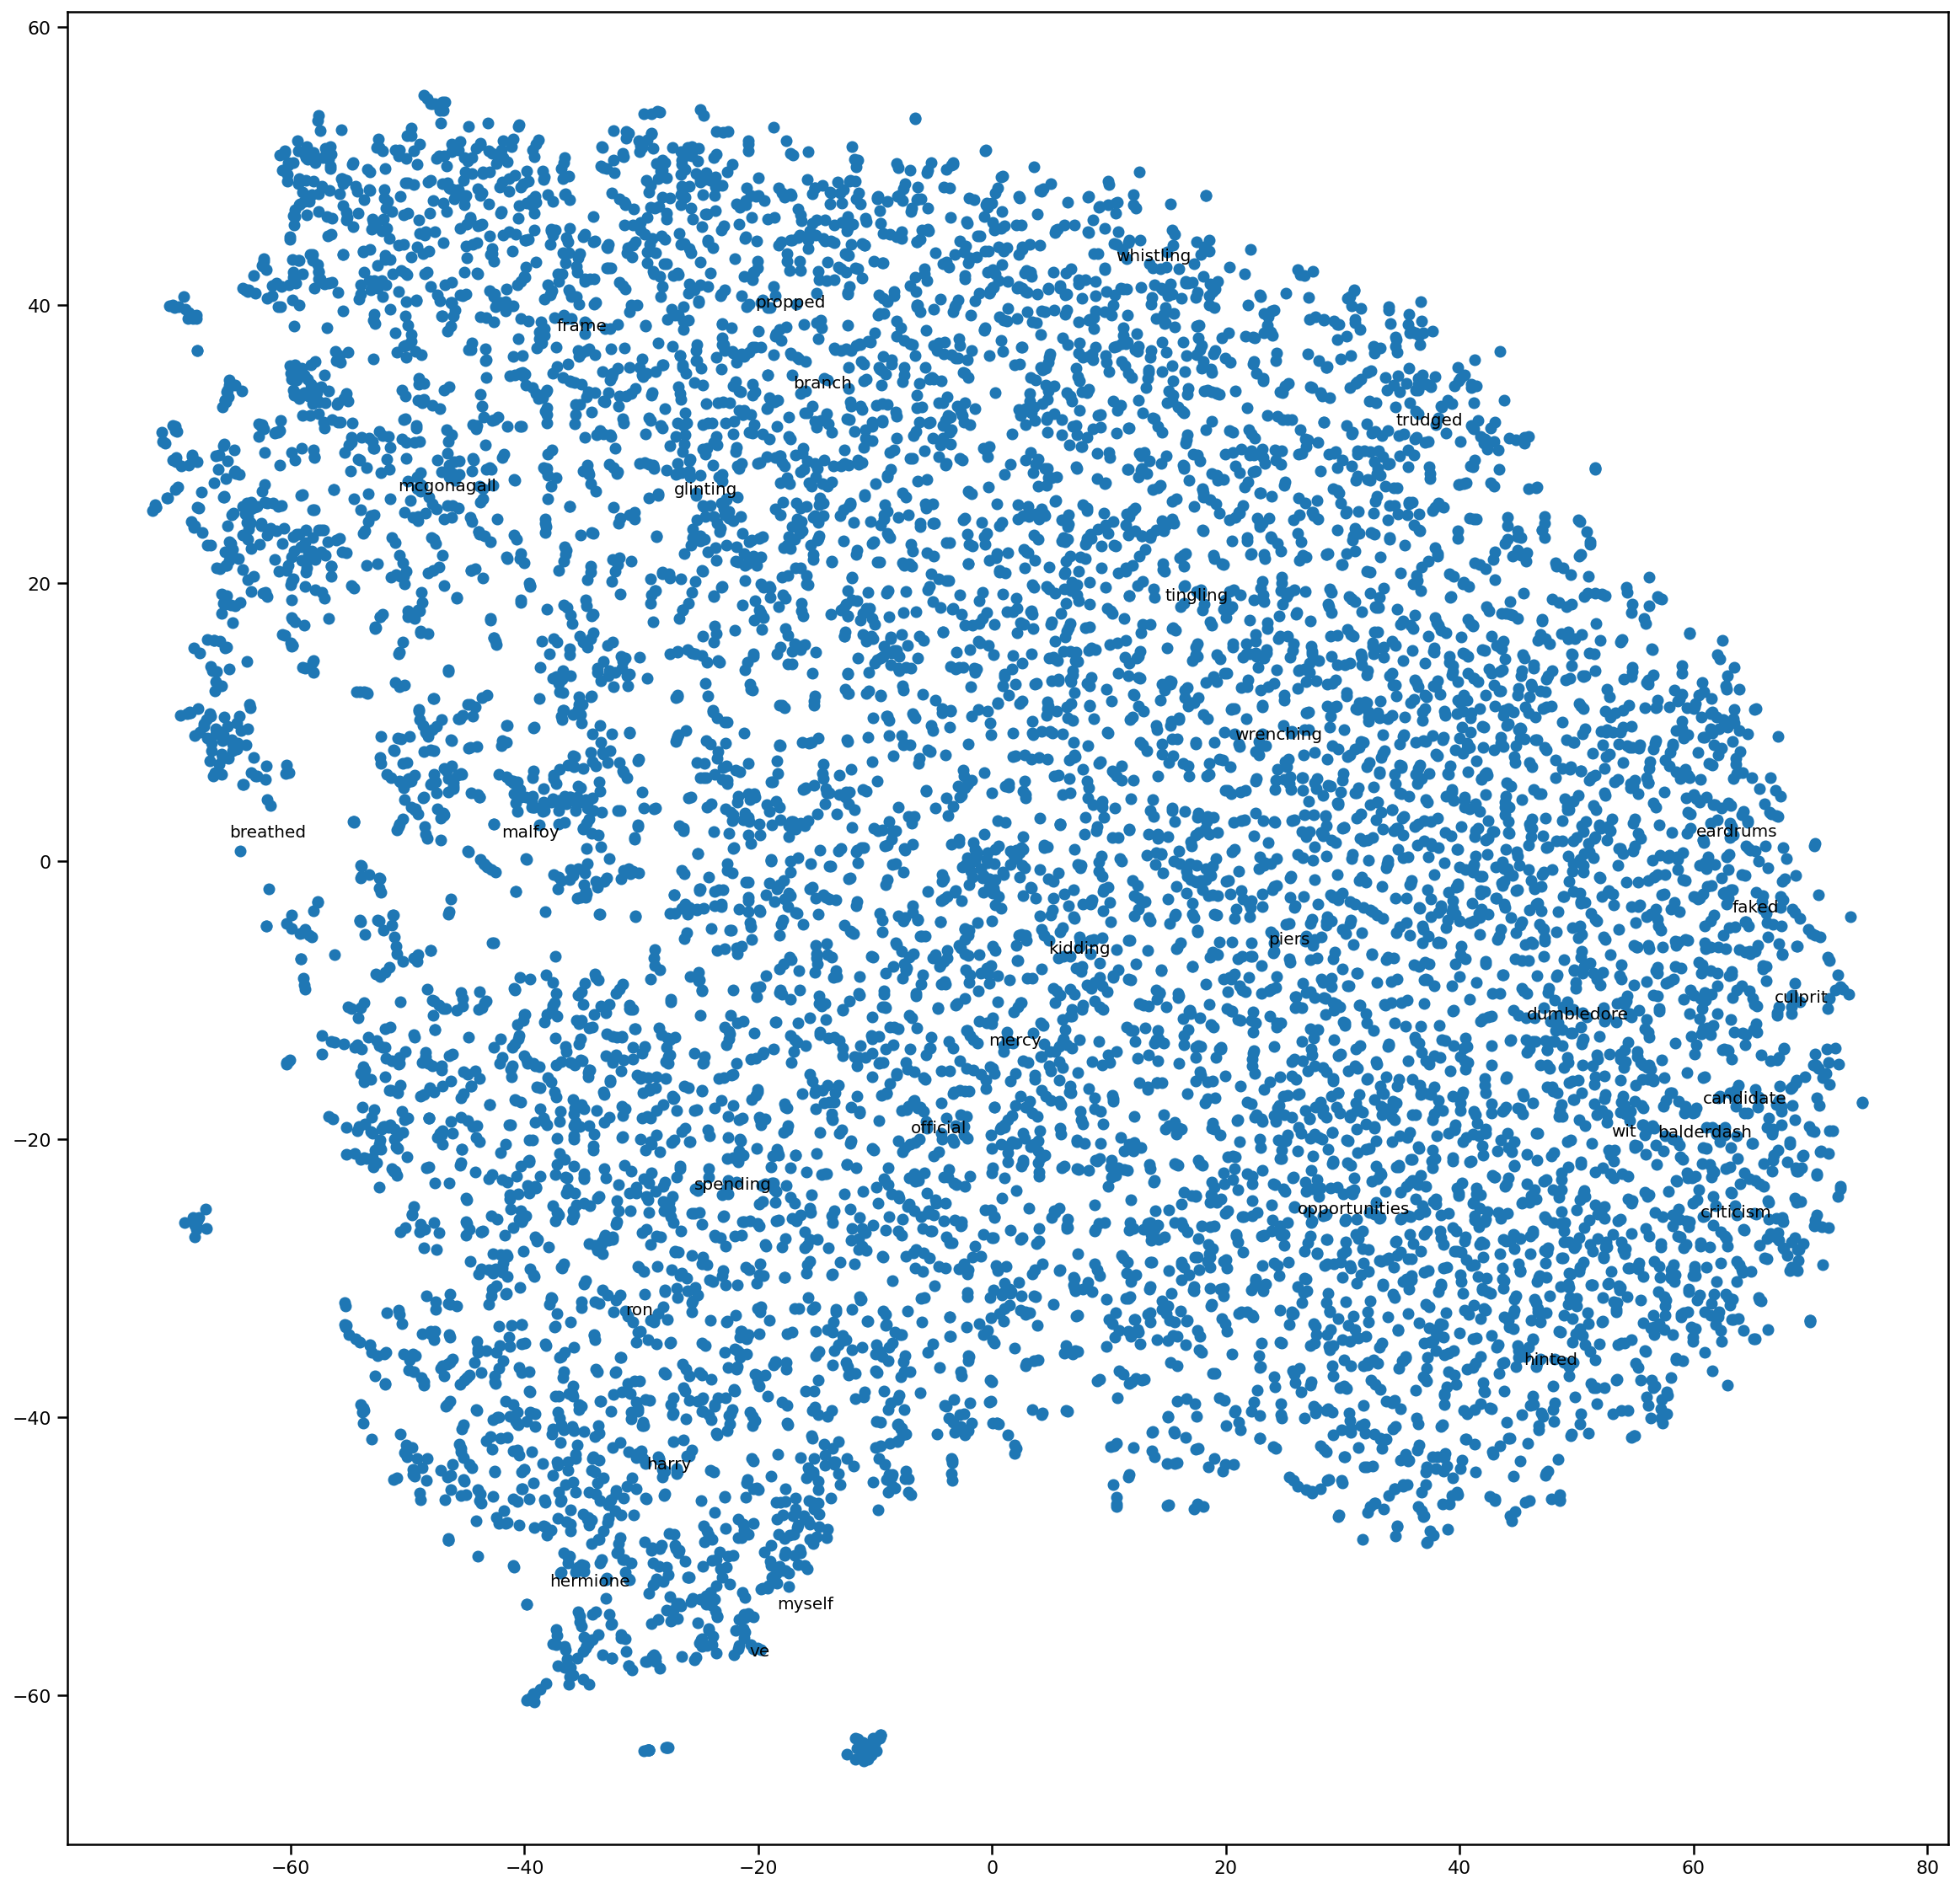

after


In [120]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

random.seed(0)
print("before")
plt.figure(figsize=(20, 20))
plt.scatter(x_vals, y_vals)

# Label randomly subsampled 25 data points
#
x_vals, y_vals, labels = reduce_dimensions(model)
labels2 = ["harry", "hermione", "ron", "malfoy", "mcgonagall", "dumbledore"]
indices = list(range(len(labels)))
selected_indices = random.sample(indices, 25)
# for i in selected_indices:
for i, _ in enumerate(labels2):
  plt.annotate(labels2[i], (x_vals[i], y_vals[i]))
for i in selected_indices:
  plt.annotate(labels[i], (x_vals[i], y_vals[i]))
plt.show();
print("after")

In [121]:
diff_vector = model.wv['harry'] - model.wv['hermione'] + model.wv['wizard']

model.wv.most_similar(positive=[diff_vector])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('wizard', 0.6895838975906372),
 ('candidate', 0.6546663045883179),
 ('man', 0.637892484664917),
 ('trepidation', 0.615587592124939),
 ('flaw', 0.6083646416664124),
 ('greatest', 0.5995267629623413),
 ('that_was', 0.5905548334121704),
 ('recapture', 0.5894371271133423),
 ('powerful', 0.5758299827575684),
 ('headmaster', 0.5728940963745117)]

In [122]:
diff_vector =  model.wv['woman'] + model.wv['king'] - model.wv['man']

model.wv.most_similar(positive=[diff_vector])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('undercover', 0.6294018030166626),
 ('come_on', 0.5868955850601196),
 ('in_here', 0.5714161992073059),
 ('angelina', 0.5683103203773499),
 ('miss', 0.5643097758293152),
 ('king', 0.5629763603210449),
 ('mum', 0.5613874793052673),
 ('arthur', 0.5600530505180359),
 ('get_out', 0.5592983365058899),
 ('d_better', 0.5582016706466675)]

In [123]:
diff_vector =  model.wv['hermione'] + model.wv['wizard'] - model.wv['harry']

model.wv.most_similar(positive=[diff_vector])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('witch', 0.5754401087760925),
 ('wizard', 0.5706895589828491),
 ('girl', 0.5550854206085205),
 ('woman', 0.5304148197174072),
 ('deal', 0.5269181728363037),
 ('little', 0.5243434309959412),
 ('law', 0.5159224271774292),
 ('muggle', 0.5142112970352173),
 ('fraud', 0.5119581818580627),
 ('factly', 0.50522780418396)]

In [124]:
diff_vector =  model.wv['dumbledore'] + model.wv['student'] - model.wv['harry']

model.wv.most_similar(positive=[diff_vector])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('the_dark', 0.6787573099136353),
 ('power', 0.6668082475662231),
 ('killings', 0.6307156085968018),
 ('of_magic', 0.619695782661438),
 ('influence', 0.6196496486663818),
 ('lord', 0.6192965507507324),
 ('born', 0.6031039953231812),
 ('the_boy', 0.5996823310852051),
 ('wizarding', 0.598950982093811),
 ('capture', 0.5988695621490479)]

In [125]:
diff_vector =  model.wv['voldemort'] + model.wv['good'] - model.wv['harry']

model.wv.most_similar(positive=[diff_vector])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('killings', 0.7511036992073059),
 ('always', 0.7498718500137329),
 ('the_dark', 0.7141319513320923),
 ('born', 0.7102143168449402),
 ('such_a', 0.7094311714172363),
 ('true', 0.7035068869590759),
 ('known', 0.7003248929977417),
 ('the_boy', 0.697669506072998),
 ('important', 0.6975716352462769),
 ('power', 0.694805920124054)]

In [126]:
model.wv.most_similar(['lord'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('master', 0.8739550709724426),
 ('servant', 0.8637853860855103),
 ('mark', 0.7955410480499268),
 ('name', 0.7666663527488708),
 ('headmaster', 0.7583256959915161),
 ('secret', 0.7539823055267334),
 ('lies', 0.7535662055015564),
 ('grandson', 0.7527766227722168),
 ('poor', 0.7520796060562134),
 ('it_is', 0.7477465271949768)]

In [127]:
diff_vector =  model.wv['malfoy'] + model.wv['muggle'] - model.wv['hermione']

model.wv.most_similar(positive=[diff_vector])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('of_magic', 0.7100179195404053),
 ('muggle', 0.7027834057807922),
 ('minister', 0.6842352151870728),
 ('wizarding', 0.6514405012130737),
 ('born', 0.6445697546005249),
 ('magical', 0.6402557492256165),
 ('influence', 0.6254081726074219),
 ('the_dark', 0.6194265484809875),
 ('wizard', 0.6146159172058105),
 ('department', 0.6009087562561035)]

In [128]:
diff_vector =  model.wv['malfoy'] + model.wv['mudblood'] - model.wv['hermione']

model.wv.most_similar(positive=[diff_vector])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('cornelius', 0.5700161457061768),
 ('albus', 0.5166561007499695),
 ('minister', 0.4895784258842468),
 ('the_dark', 0.48272207379341125),
 ('subjected', 0.4788593649864197),
 ('prime', 0.47744619846343994),
 ('tom', 0.47533947229385376),
 ('of_magic', 0.4752672016620636),
 ('phineas', 0.4627090096473694),
 ('crouch', 0.4496760368347168)]

In [129]:
diff_vector =  model.wv['hermione'] + model.wv['pureblood'] - model.wv['malfoy']

model.wv.most_similar(positive=[diff_vector])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('hermione', 0.7152366638183594),
 ('she', 0.5261984467506409),
 ('off', 0.5137455463409424),
 ('up', 0.4773218631744385),
 ('and_ron', 0.4635808765888214),
 ('ginny', 0.4569166302680969),
 ('and_hermione', 0.4355917274951935),
 ('on', 0.4308578372001648),
 ('together', 0.4173741638660431),
 ('over', 0.4169352054595947)]

In [130]:
diff_vector =  model.wv['hermione'] + model.wv['hedwig'] - model.wv['harry']

model.wv.most_similar(positive=[diff_vector])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('herself', 0.6647487878799438),
 ('hermione', 0.6380034685134888),
 ('her', 0.599635124206543),
 ('as_she', 0.5990011692047119),
 ('parvati', 0.5730112195014954),
 ('lavender', 0.5701656341552734),
 ('tears', 0.5610041618347168),
 ('and_ron', 0.5512231588363647),
 ('terrified', 0.5350091457366943),
 ('fleur', 0.5346561670303345)]

In [131]:
diff_vector =  model.wv['hermione'] + model.wv['owl'] - model.wv['harry']

model.wv.most_similar(positive=[diff_vector])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('herself', 0.5503922700881958),
 ('husband', 0.5264321565628052),
 ('clipboard', 0.5163770914077759),
 ('wringing', 0.5026840567588806),
 ('spellman', 0.4974917471408844),
 ('her', 0.49668800830841064),
 ('hermione', 0.4918630123138428),
 ('handbag', 0.4837350845336914),
 ('as_she', 0.48344847559928894),
 ('clasp', 0.483154833316803)]

In [132]:
model.wv.most_similar(["crookshanks"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('hedwig', 0.9342148303985596),
 ('sideways', 0.8991611003875732),
 ('fang', 0.8941976428031921),
 ('chair', 0.8908979892730713),
 ('purring', 0.8870424032211304),
 ('his_feet', 0.8870389461517334),
 ('his_hand', 0.8857121467590332),
 ('leapt', 0.8841187953948975),
 ('his_hands', 0.8828856348991394),
 ('directly', 0.8817973136901855)]

In [133]:
model.wv.most_similar(["hedwig"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('crookshanks', 0.9342148303985596),
 ('cage', 0.8792949914932251),
 ('his_hand', 0.8692318201065063),
 ('bag', 0.8669182062149048),
 ('fang', 0.8645199537277222),
 ('desk', 0.8570905327796936),
 ('drawers', 0.8568233251571655),
 ('wrist', 0.8503516912460327),
 ('lap', 0.8460400104522705),
 ('his_wand', 0.8456740379333496)]

In [134]:
model.wv.most_similar(["sirius"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('dumbledore', 0.8959547281265259),
 ('what_he', 0.8411612510681152),
 ('james', 0.8381680846214294),
 ('snape', 0.8256338834762573),
 ('cedric', 0.8116422891616821),
 ('everything', 0.8115063905715942),
 ('voldemort', 0.7838355898857117),
 ('someone', 0.7791193127632141),
 ('slughorn', 0.7723154425621033),
 ('riddle', 0.7627735137939453)]

In [135]:
st = time.time()
model.train(all_phrases, total_words=model.corpus_total_words, epochs=3)
et = time.time()

print(et-st)

9.168534517288208


In [136]:
model.wv.most_similar(["sirius"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('dumbledore', 0.7662327289581299),
 ('snape', 0.7325490117073059),
 ('james', 0.729865550994873),
 ('what_he', 0.7160506248474121),
 ('cedric', 0.7135509848594666),
 ('voldemort', 0.6905480027198792),
 ('someone', 0.688880205154419),
 ('kreacher', 0.6872324347496033),
 ('gregorovitch', 0.6689148545265198),
 ('moody', 0.6689017415046692)]

In [137]:
model.wv.most_similar(["hedwig"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('crookshanks', 0.8313168883323669),
 ('bag', 0.7751646041870117),
 ('cage', 0.7596120834350586),
 ('errol', 0.7398105263710022),
 ('pigwidgeon', 0.7281124591827393),
 ('drawers', 0.7233444452285767),
 ('the_letter', 0.7172593474388123),
 ('owl', 0.7160855531692505),
 ('his_hand', 0.7099266052246094),
 ('madam_hooch', 0.7064360976219177)]

In [138]:
diff_vector =  model.wv['hermione'] + model.wv['owl'] - model.wv['harry']

model.wv.most_similar(positive=[diff_vector])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('hermione', 0.6401402950286865),
 ('owl', 0.5633874535560608),
 ('she', 0.47503662109375),
 ('cat', 0.4699116349220276),
 ('hedwig', 0.4512009024620056),
 ('herself', 0.45071300864219666),
 ('bag', 0.433280348777771),
 ('toast', 0.43002814054489136),
 ('beak', 0.41696006059646606),
 ('paper', 0.41665446758270264)]

**Training for 100 Epochs**

In [139]:
st = time.time()
model.train(all_phrases, total_words=model.corpus_total_words, epochs=100)
et = time.time()

print(et-st)


273.7127435207367


In [142]:
diff_vector =  model.wv['hermione'] + model.wv['owl'] - model.wv['harry']

model.wv.most_similar(positive=[diff_vector])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('owl', 0.8197685480117798),
 ('hermione', 0.5121654272079468),
 ('hedwig', 0.32853472232818604),
 ('envelope', 0.3249832093715668),
 ('owls', 0.2813470959663391),
 ('beak', 0.28087806701660156),
 ('package', 0.27628782391548157),
 ('bowl', 0.27340197563171387),
 ('errol', 0.27274149656295776),
 ('letter', 0.26817575097084045)]

In [143]:
model.wv.most_similar("voldemort")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('the_dark', 0.46533840894699097),
 ('dumbledore', 0.44600406289100647),
 ('wormtail', 0.3960896134376526),
 ('snape', 0.37852978706359863),
 ('he', 0.3680897355079651),
 ('bellatrix', 0.36436009407043457),
 ('what_he', 0.3410012423992157),
 ('dudley', 0.3266710042953491),
 ('it', 0.3096952438354492),
 ('your_father', 0.30354297161102295)]

In [146]:
model.wv.most_similar("buckbeak")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('hagrid', 0.327312171459198),
 ('hedwig', 0.3146924674510956),
 ('it', 0.2953304350376129),
 ('ron', 0.2624785304069519),
 ('fang', 0.259080171585083),
 ('firenze', 0.24485629796981812),
 ('cabin', 0.23854941129684448),
 ('hippogriff', 0.23470079898834229),
 ('harry', 0.23360338807106018),
 ('swing', 0.22786179184913635)]

In [147]:
model.wv.most_similar("aragog")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('hagrid', 0.2574688792228699),
 ('descendants', 0.25514861941337585),
 ('grawp', 0.2513551414012909),
 ('meat', 0.24824604392051697),
 ('magorian', 0.2479480654001236),
 ('nicely', 0.23976214230060577),
 ('jus', 0.23864643275737762),
 ('skrewts', 0.23555442690849304),
 ('yeh', 0.23060296475887299),
 ('hippogriff', 0.22954632341861725)]

In [148]:
model.wv.most_similar("umbridge")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('trelawney', 0.551895797252655),
 ('tofty', 0.49249371886253357),
 ('marchbanks', 0.4684996008872986),
 ('lupin', 0.46107813715934753),
 ('vector', 0.4511618912220001),
 ('binns', 0.45066434144973755),
 ('sinistra', 0.42929062247276306),
 ('slughorn', 0.42376774549484253),
 ('lockhart', 0.420307457447052),
 ('sprout', 0.41454118490219116)]

In [151]:
model.wv.most_similar("padfoot")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('prongs', 0.6605693101882935),
 ('moony', 0.5911245346069336),
 ('sorcery', 0.2384638488292694),
 ('fancies', 0.2350187748670578),
 ('montague', 0.2342403084039688),
 ('photograph', 0.22995202243328094),
 ('wormtail', 0.22984835505485535),
 ('junk', 0.22801357507705688),
 ('items', 0.22358432412147522),
 ('tom', 0.22047722339630127)]

In [152]:
model.wv.most_similar("patronus")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('dementor', 0.3450968563556671),
 ('stag', 0.33261483907699585),
 ('nickname', 0.31752949953079224),
 ('doe', 0.29977360367774963),
 ('priority', 0.286446213722229),
 ('title', 0.2847204804420471),
 ('wand', 0.280652791261673),
 ('mistake', 0.2739594876766205),
 ('vapor', 0.2726238965988159),
 ('produce', 0.2634584307670593)]